In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Basic Overview
This dataset captures job offers for software engineers in Poland for the month of September 2023. Data is divided into 10 columns listed below:

- **ID**: A unique identifier for each job listing.
- **Company**: Specifies the hiring company's name.
- **Company Size**: Indicates the number of employees at the company.
- **Location**: City where the job is located.
- **Technology**: The primary programming language or tech stack required.
- **Seniority**: Level of experience/seniority desired (e.g., junior, mid, senior).
- **Salary Employment Min** and **Salary Employment Max**: Salary range for traditional employment contracts.
- **Salary B2B Min** and **Salary B2B Max**: Salary range for B2B contracts.

There are 1918 entries - each represents different job offer. Dataset contains missing values:
- **'company size'**: 335 missing entries (167 companies)
- **'technology'**: 1 missing (company: Link Group (1 entry)).

In total there are 746 unique companies. Due to the to the way the data was collected unfortunately we don't have exact knowledge about salary and company size.

In [134]:
df = pd.read_csv("202309_soft_eng_jobs_pol.csv")
df.head()

,id,company,company size,location,technology,seniority,salary employment min,salary employment max,salary b2b min,salary b2b max
0,5bfb1ec0512511bd22e1bf2f254ca81f,Link Group,100.0,Kraków,Python,mid,22000.0,29000.0,NaN,NaN
1,8fa6237a5a060886969c92c40a03e1d0,Link Group,100.0,Katowice,Python,mid,22000.0,29000.0,NaN,NaN
2,2007c9732dfdca3886159998df9fe690,Link Group,100.0,Warszawa,C#,senior,NaN,NaN,30000.0,40000.0
3,d8fccc479de7039201050b21f077db8a,Link Group,100.0,Katowice,C#,senior,NaN,NaN,30000.0,40000.0
4,677f9dcf2a3b0e484410df669b31db96,Link Group,100.0,Kraków,C#,senior,NaN,NaN,30000.0,40000.0


In [135]:
df.info()
print()
print("Number of missing salary values: ", df[['salary employment min', 'salary employment max', 'salary b2b min', 'salary b2b max']].isnull().all(axis=1).sum())
companies_without_size = df.loc[df['company size'].isnull(), 'company'].unique()
print("Number of companies with missing size: ", companies_without_size.size)
print("Comapny that doesnt specify technology: ", df.loc[df['technology'].isnull(), 'company'].iloc[0])
print(f"Number of companies: {len(df['company'].unique())}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1918 non-null   object 
 1   company                1918 non-null   object 
 2   company size           1583 non-null   float64
 3   location               1918 non-null   object 
 4   technology             1917 non-null   object 
 5   seniority              1918 non-null   object 
 6   salary employment min  906 non-null    float64
 7   salary employment max  906 non-null    float64
 8   salary b2b min         1548 non-null   float64
 9   salary b2b max         1548 non-null   float64
dtypes: float64(5), object(5)
memory usage: 150.0+ KB

Number of missing salary values:  0
Number of companies with missing size:  167
Comapny that doesnt specify technology:  Link Group
Number of companies: 746


In [136]:
df.describe()

,company size,salary employment min,salary employment max,salary b2b min,salary b2b max
count,1583.000000,906.000000,906.000000,1548.000000,1548.000000
mean,1615.661402,14831.067329,20858.839956,18274.655039,24469.308786
std,8910.950771,5650.737354,6702.553709,6112.811875,6696.755100
min,1.000000,5000.000000,5000.000000,5000.000000,7000.000000
25%,10.000000,10200.000000,16518.000000,13687.500000,20000.000000
50%,100.000000,14500.000000,20000.000000,18000.000000,25000.000000
75%,1000.000000,18000.000000,24310.250000,22000.000000,28560.000000
max,100000.000000,40000.000000,47000.000000,41390.000000,49560.000000


# Variables Distribution

Below are the plots presenting distributions of: technology, location, seniority and company size. The top three programing languages are: Java (25.23%), JavaScript (23.36%) and C# (13.92%). More than a half are remote job offers. Cities with the most offers are: Warszawa (16.58%), Kraków (9.80%) and Wrocław (6.52%). Unfortunately this database doesn't contain entries with offers for internship. The most searched employees are mids and seniors - the amount of offers for juniors and expert is similar. As it comes to company size the most companies are those with 100+ employees. The most popular contract type is B2B (business to business).

In [137]:
def add_percentage(ax, df, column_name):
    for c in ax.containers:
        labels = [f'{h / len(df[column_name]) * 100:.2f}%' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

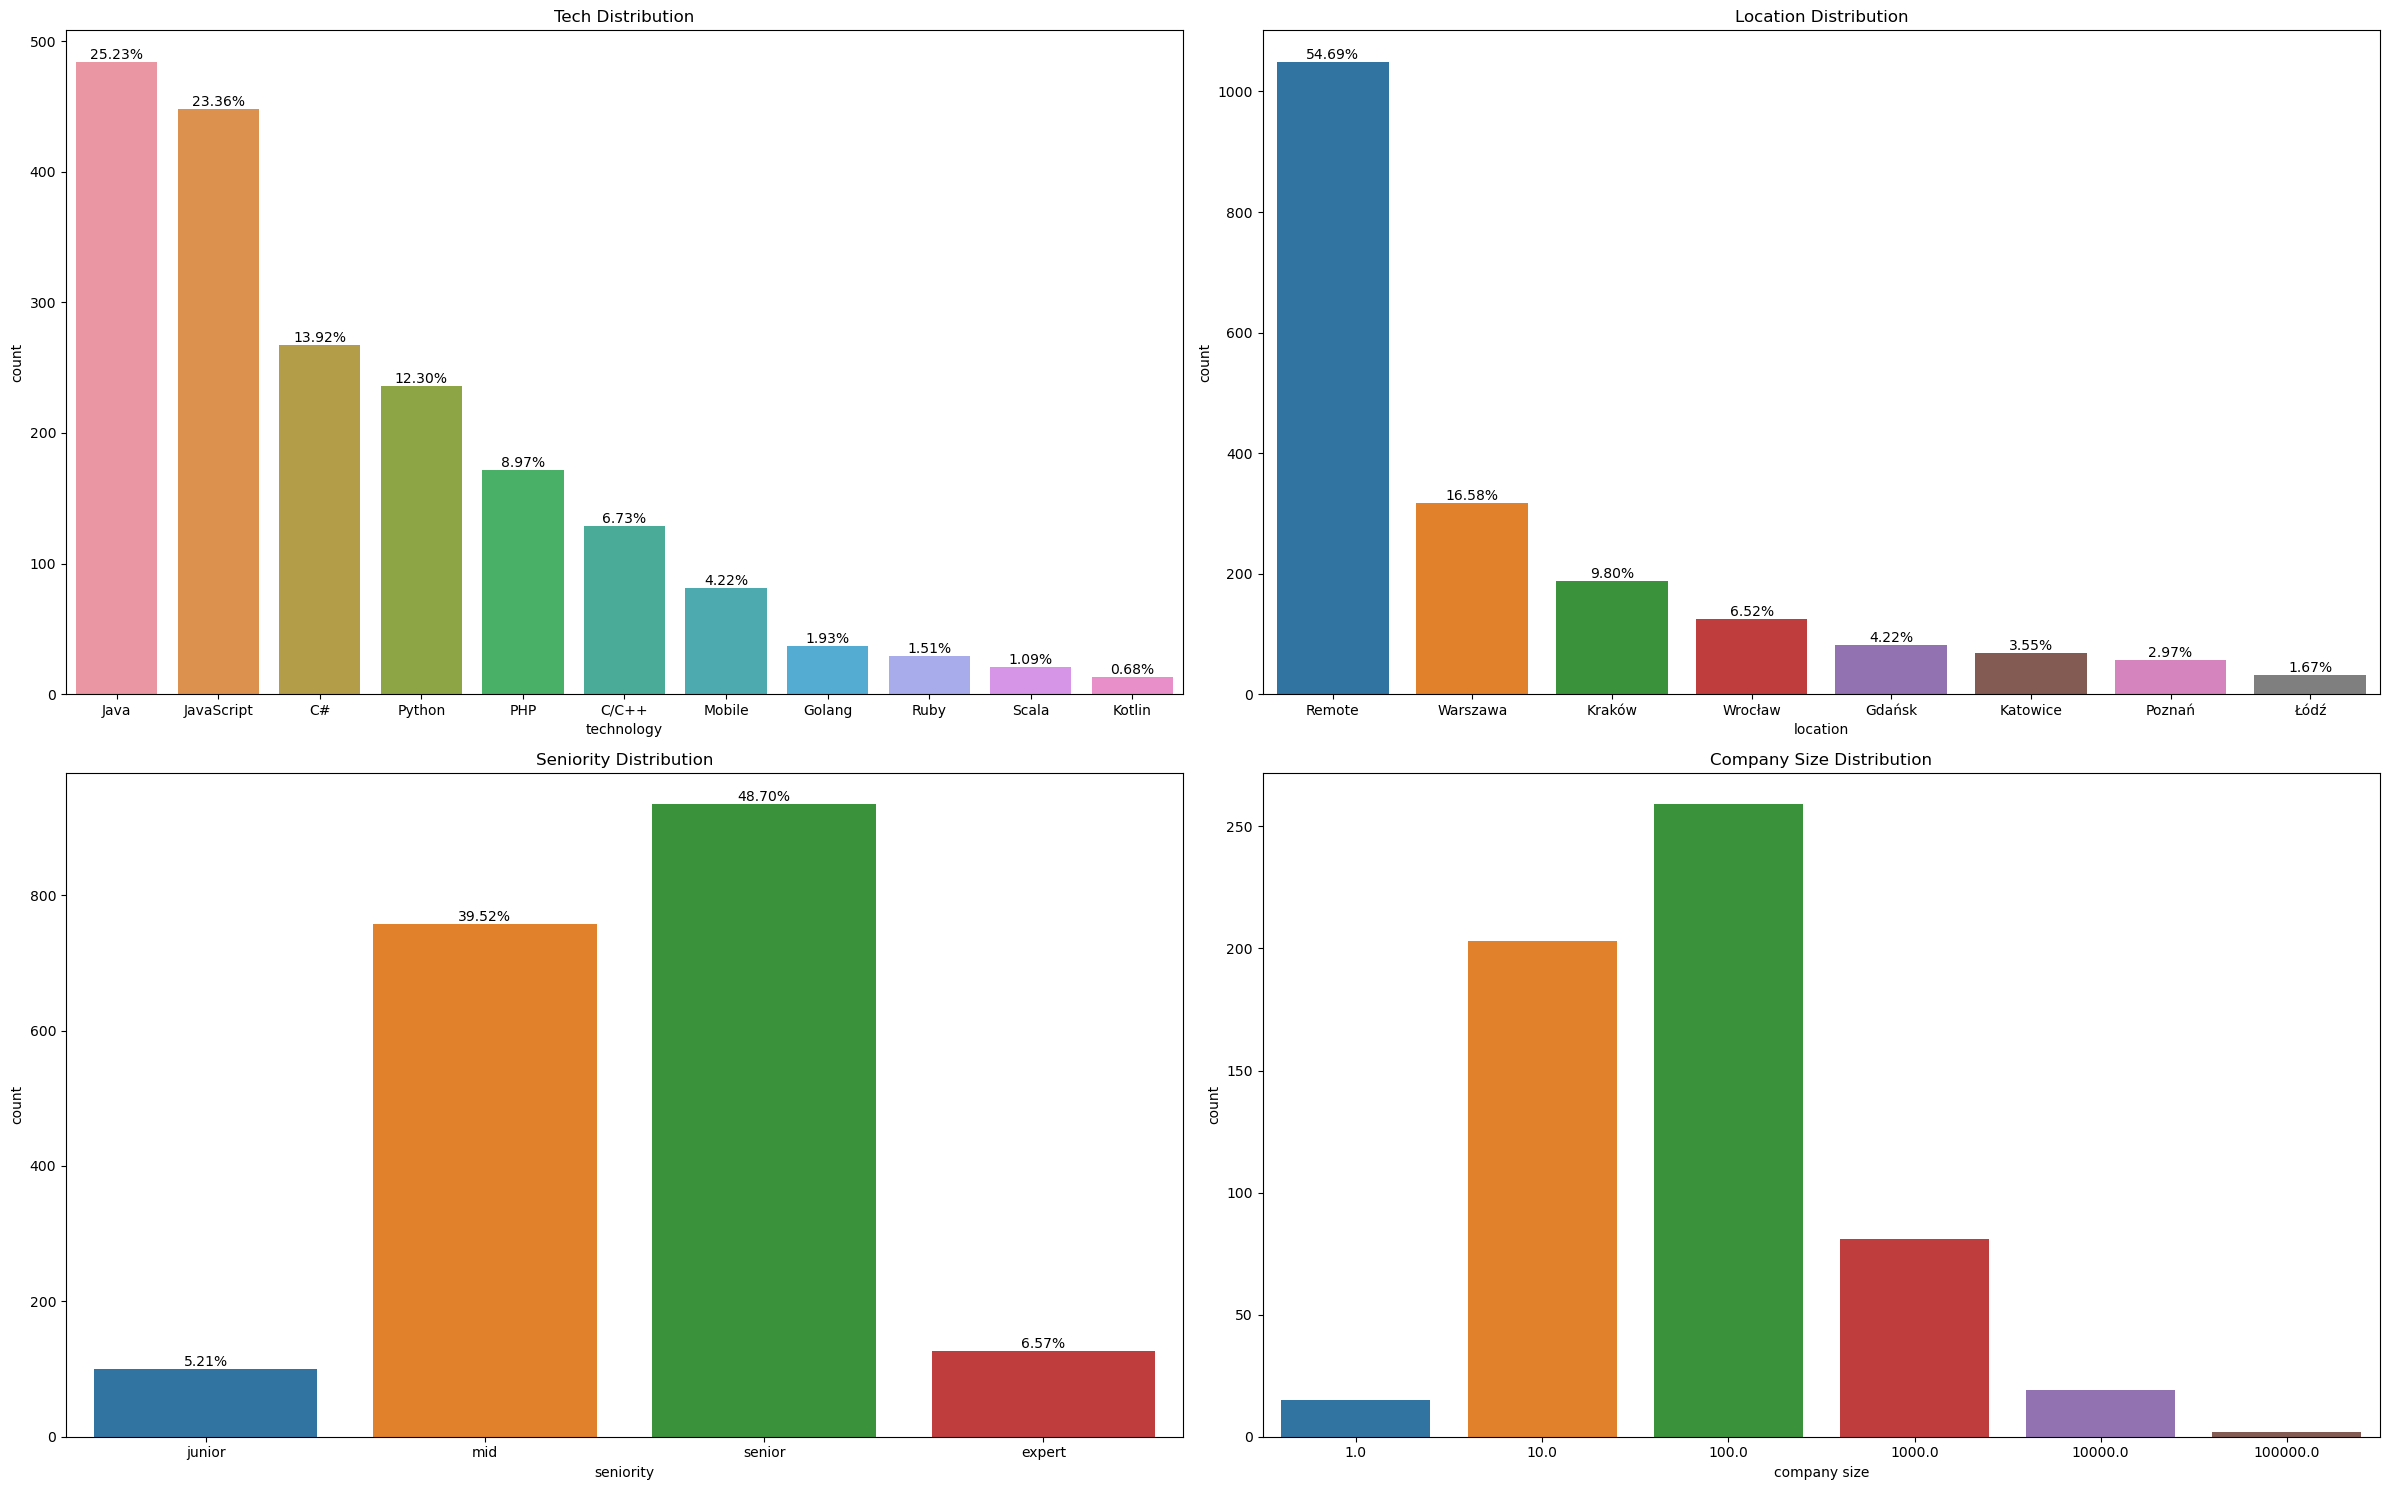

In [138]:
plt.figure(figsize=(24, 15))

# Plot for 'tech'
plt.subplot(2, 2, 1)
ax = sns.countplot(x='technology', data=df, order=df['technology'].value_counts().index)
plt.title('Tech Distribution')

add_percentage(ax, df, 'technology')

# Plot for 'location'
plt.subplot(2, 2, 2)
ax = sns.countplot(x='location', data=df, order=df['location'].value_counts().index)
plt.title('Location Distribution')

add_percentage(ax, df, 'location')

# Plot for 'seniority'
plt.subplot(2, 2, 3)
ax = sns.countplot(x='seniority', data=df, order=['junior', 'mid', 'senior', 'expert'])
plt.title('Seniority Distribution')

add_percentage(ax, df, 'seniority')

# Plot for 'company size'
plt.subplot(2, 2, 4)
ax = sns.countplot(x='company size', data=df.drop_duplicates(subset='company'))
plt.title('Company Size Distribution')

plt.tight_layout()
plt.show()

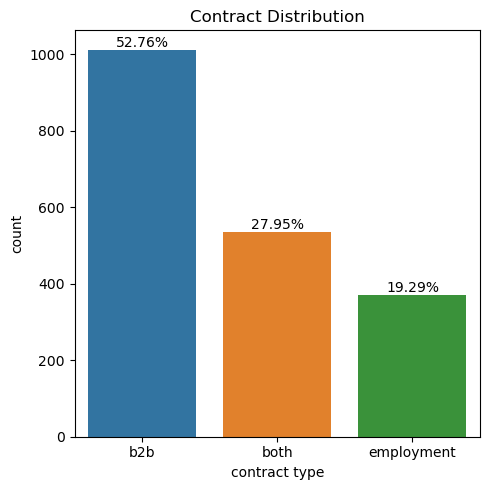

In [139]:
def categorize_salary(row):
    if pd.notnull(row['salary b2b min']) and pd.notnull(row['salary b2b max']) and pd.isnull(row['salary employment min']) and pd.isnull(row['salary employment max']):
        return 'b2b'
    elif pd.isnull(row['salary b2b min']) and pd.isnull(row['salary b2b max']) and pd.notnull(row['salary employment min']) and pd.notnull(row['salary employment max']):
        return 'employment'
    elif pd.notnull(row['salary b2b min']) and pd.notnull(row['salary b2b max']) and pd.notnull(row['salary employment min']) and pd.notnull(row['salary employment max']):
        return 'both'
    else:
        return None

df['contract type'] = df.apply(categorize_salary, axis=1)

plt.figure(figsize=(5, 5))

ax = sns.countplot(x='contract type', data=df, order=['b2b', 'both', 'employment'])
plt.title('Contract Distribution')

add_percentage(ax, df, 'company size')

plt.tight_layout()
plt.show()

# Contract types

B2B contract types reach their peak for remote jobs. For the rest of cities (excluding Warszawa) this doesn't occur. Type of contract is also dependent on the seniority (more B2B for mids and seniors) and company size (+10000 employee companies tend to offer usual employment - for the companies below this size B2B contracts still dominate). As it comes to used technologies the only one in which B2B contracts don't dominate are C/C++, Mobile and Kotlin.

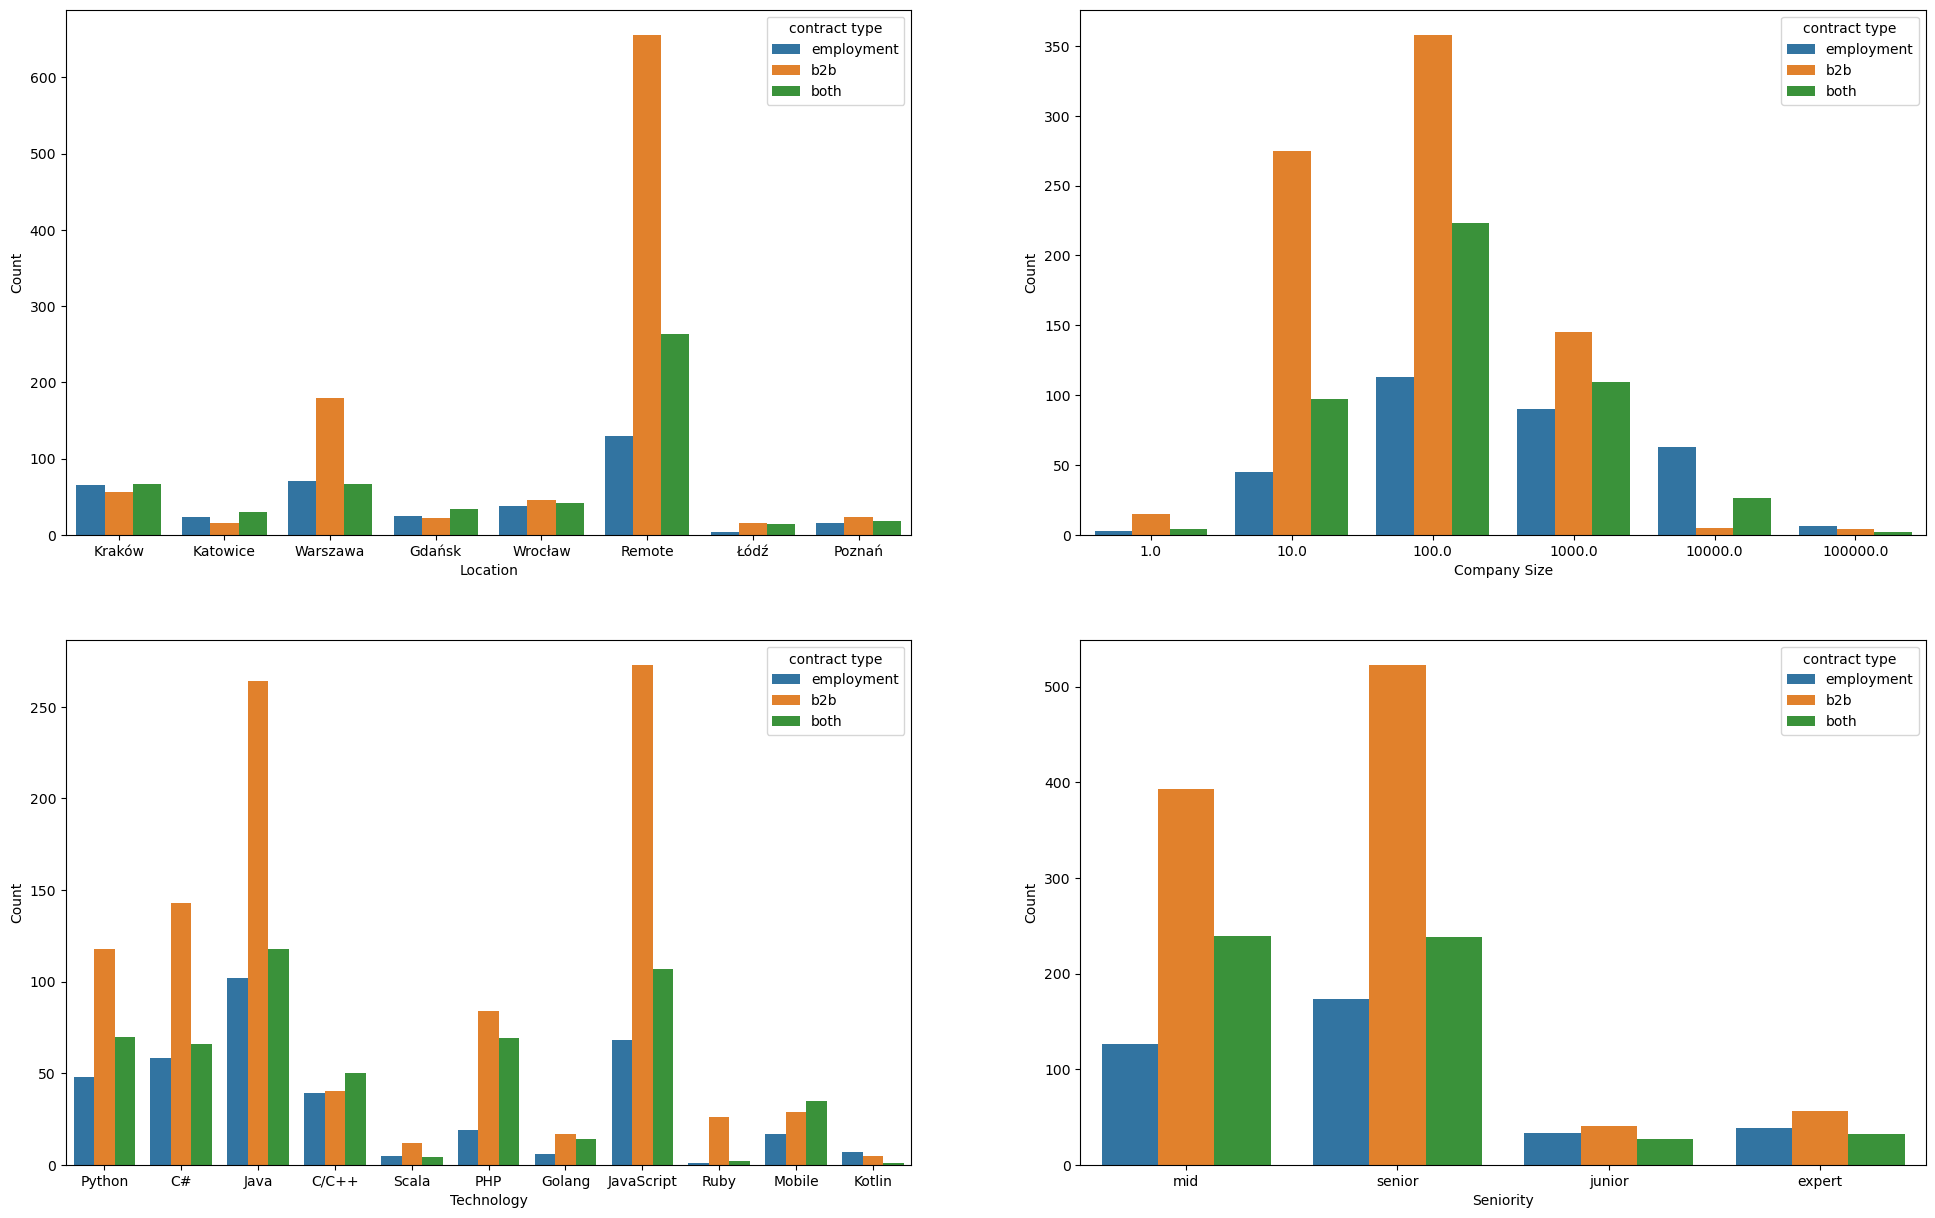

In [140]:
plt.figure(figsize=(24, 15))

# Contract type vs Location
plt.subplot(2, 2, 1)
a = sns.countplot(x='location', hue='contract type', data=df)
a.set_xlabel('Location')
a.set_ylabel('Count')

# Contract type vs Company Size
plt.subplot(2, 2, 2)
b = sns.countplot(x='company size', hue='contract type', data=df)
b.set_xlabel('Company Size')
b.set_ylabel('Count')

# Contract type vs Technology
plt.subplot(2, 2, 3)
c = sns.countplot(x='technology', hue='contract type', data=df)
c.set_xlabel('Technology')
c.set_ylabel('Count')

# Contract type vs Seniority
plt.subplot(2, 2, 4)
d = sns.countplot(x='seniority', hue='contract type', data=df)
d.set_xlabel('Seniority')
d.set_ylabel('Count')

plt.show()

# Seniority

As I mentioned before the most desirable are mid and senior level employees. In comparison to other programing languages the proportions of junior level employees to other are the most favorable for C/C++. In general the most offers for juniors are for Java, C#, C/C++, Python, PHP and JavaScript.

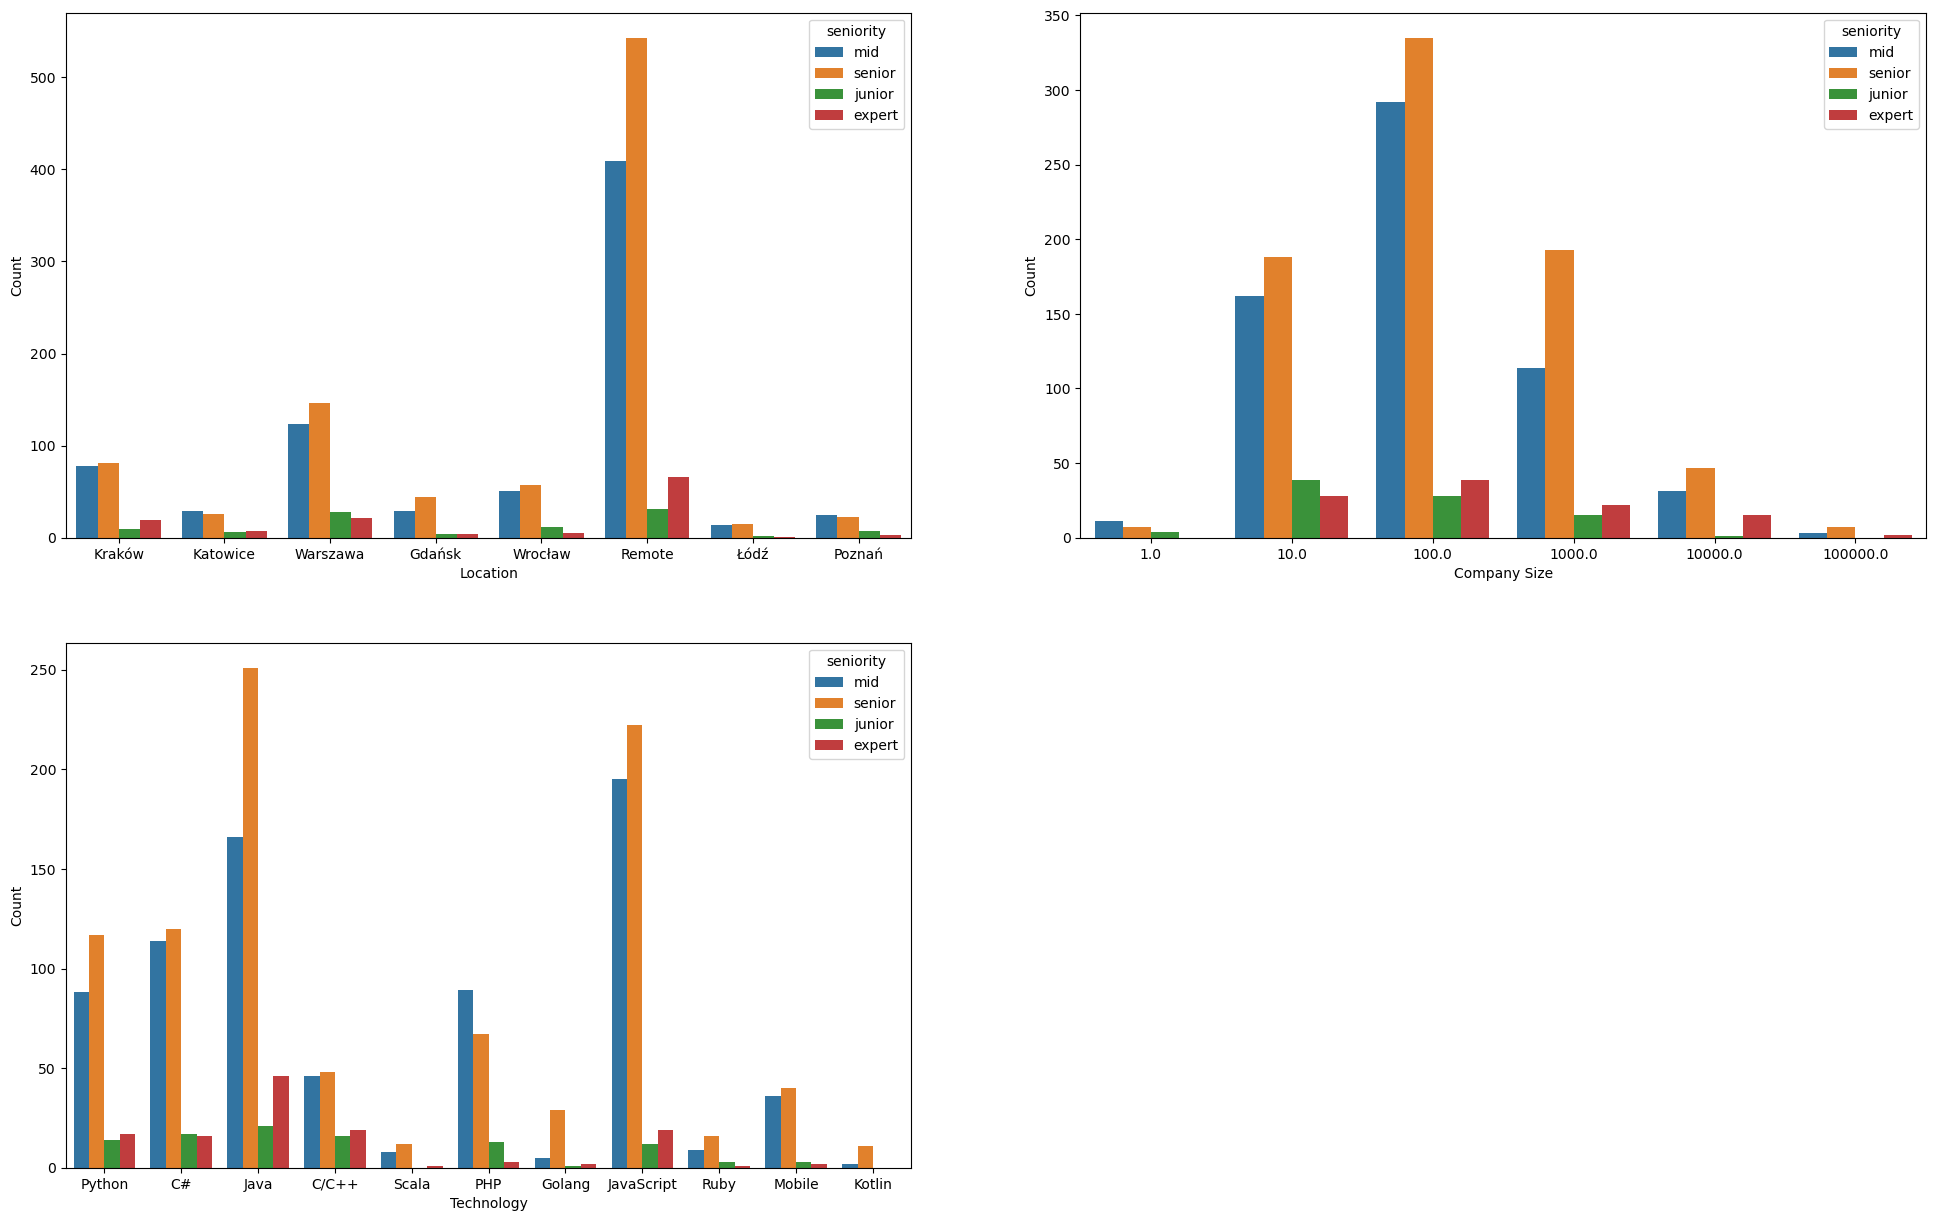

In [141]:
plt.figure(figsize=(24, 15))

# Seniority vs Location
plt.subplot(2, 2, 1)
a = sns.countplot(x='location', hue='seniority', data=df)
a.set_xlabel('Location')
a.set_ylabel('Count')

# Seniority vs Company Size
plt.subplot(2, 2, 2)
b = sns.countplot(x='company size', hue='seniority', data=df)
b.set_xlabel('Company Size')
b.set_ylabel('Count')

# Seniority vs Technology
plt.subplot(2, 2, 3)
c = sns.countplot(x='technology', hue='seniority', data=df)
c.set_xlabel('Technology')
c.set_ylabel('Count')

plt.show()

# Salary

In order to analyze salary I decided to take max and min values for both B2B and normal employment and take the highest mean for every entry. This of course has its drawbacks but it greatly simplifes the process. We need to keep in mind that resulting values are likely inflated becouse of that. Additionaly the author doesnt specify if those entries are net or gross salary (for B2B it's more likely that provided values are gross salary as in this type of contract emplyoee is the one taking care of taxes for himself).

Plots below show distribution and median value of salaries in certain categories. As expected the higher seniority level you have the more you earn. As it comes to salary vs technology I took into the account 6 most common languages. For junior C# and Python are least profitable, for mid C/C++, JavaScript and PHP. Senior level employees earn least in PHP. As it comes to expert-level jobs salaries naturally vary a little bit more than for lower seniorities yet their median value seem to be similar across technologies. For PHP expert level there isnt enough data to take it into the account.

What is not suprising is that the highest pays are in Warszawa and in remote jobs. Kraków and Wrocław seem to offer quite similar salary.

C:\Users\maury\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\maury\AppData\Local\Temp\ipykernel_14380\302047571.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


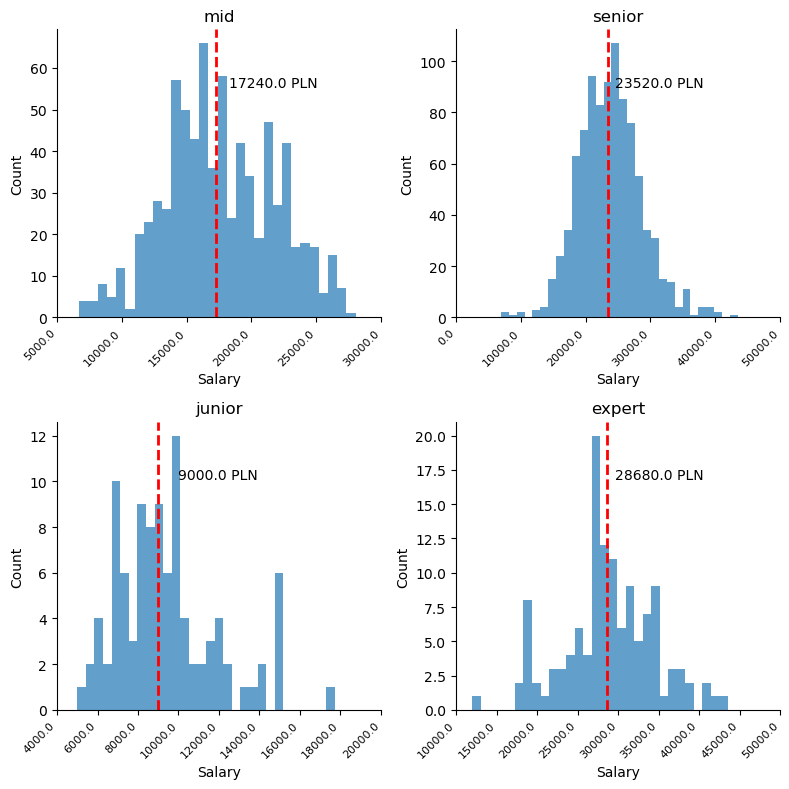

In [142]:
# company size & seniority, location & seniority

# dalculate mean salary
df['employment_mean'] = df[['salary employment min', 'salary employment max']].mean(axis=1)
df['b2b_mean'] = df[['salary b2b min', 'salary b2b max']].mean(axis=1)
df['mean salary'] = df[['employment_mean', 'b2b_mean']].max(axis=1)
df['mean salary'] = df['mean salary'].round().astype(int)
df = df.drop(columns=['employment_mean', 'b2b_mean'])

# draw plots
g = sns.FacetGrid(df, col="seniority", col_wrap=2, height=4, sharex=False, sharey=False)
g.map(plt.hist, 'mean salary', bins=30, alpha=0.7)

for ax, seniority in zip(g.axes, df['seniority'].unique()):
    subset = df[df['seniority'] == seniority]
    median_salary = subset['mean salary'].median()
    ax.axvline(median_salary, color='red', linestyle='dashed', linewidth=2)
    ax.set_title(seniority)
    ax.set_xlabel('Salary')
    ax.set_ylabel('Count')
    ax.annotate(f'{median_salary} PLN', 
             xy=(median_salary + 1000, 0.8), xycoords=('data', 'axes fraction'))
    x_ticks = ax.get_xticks()
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks, rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

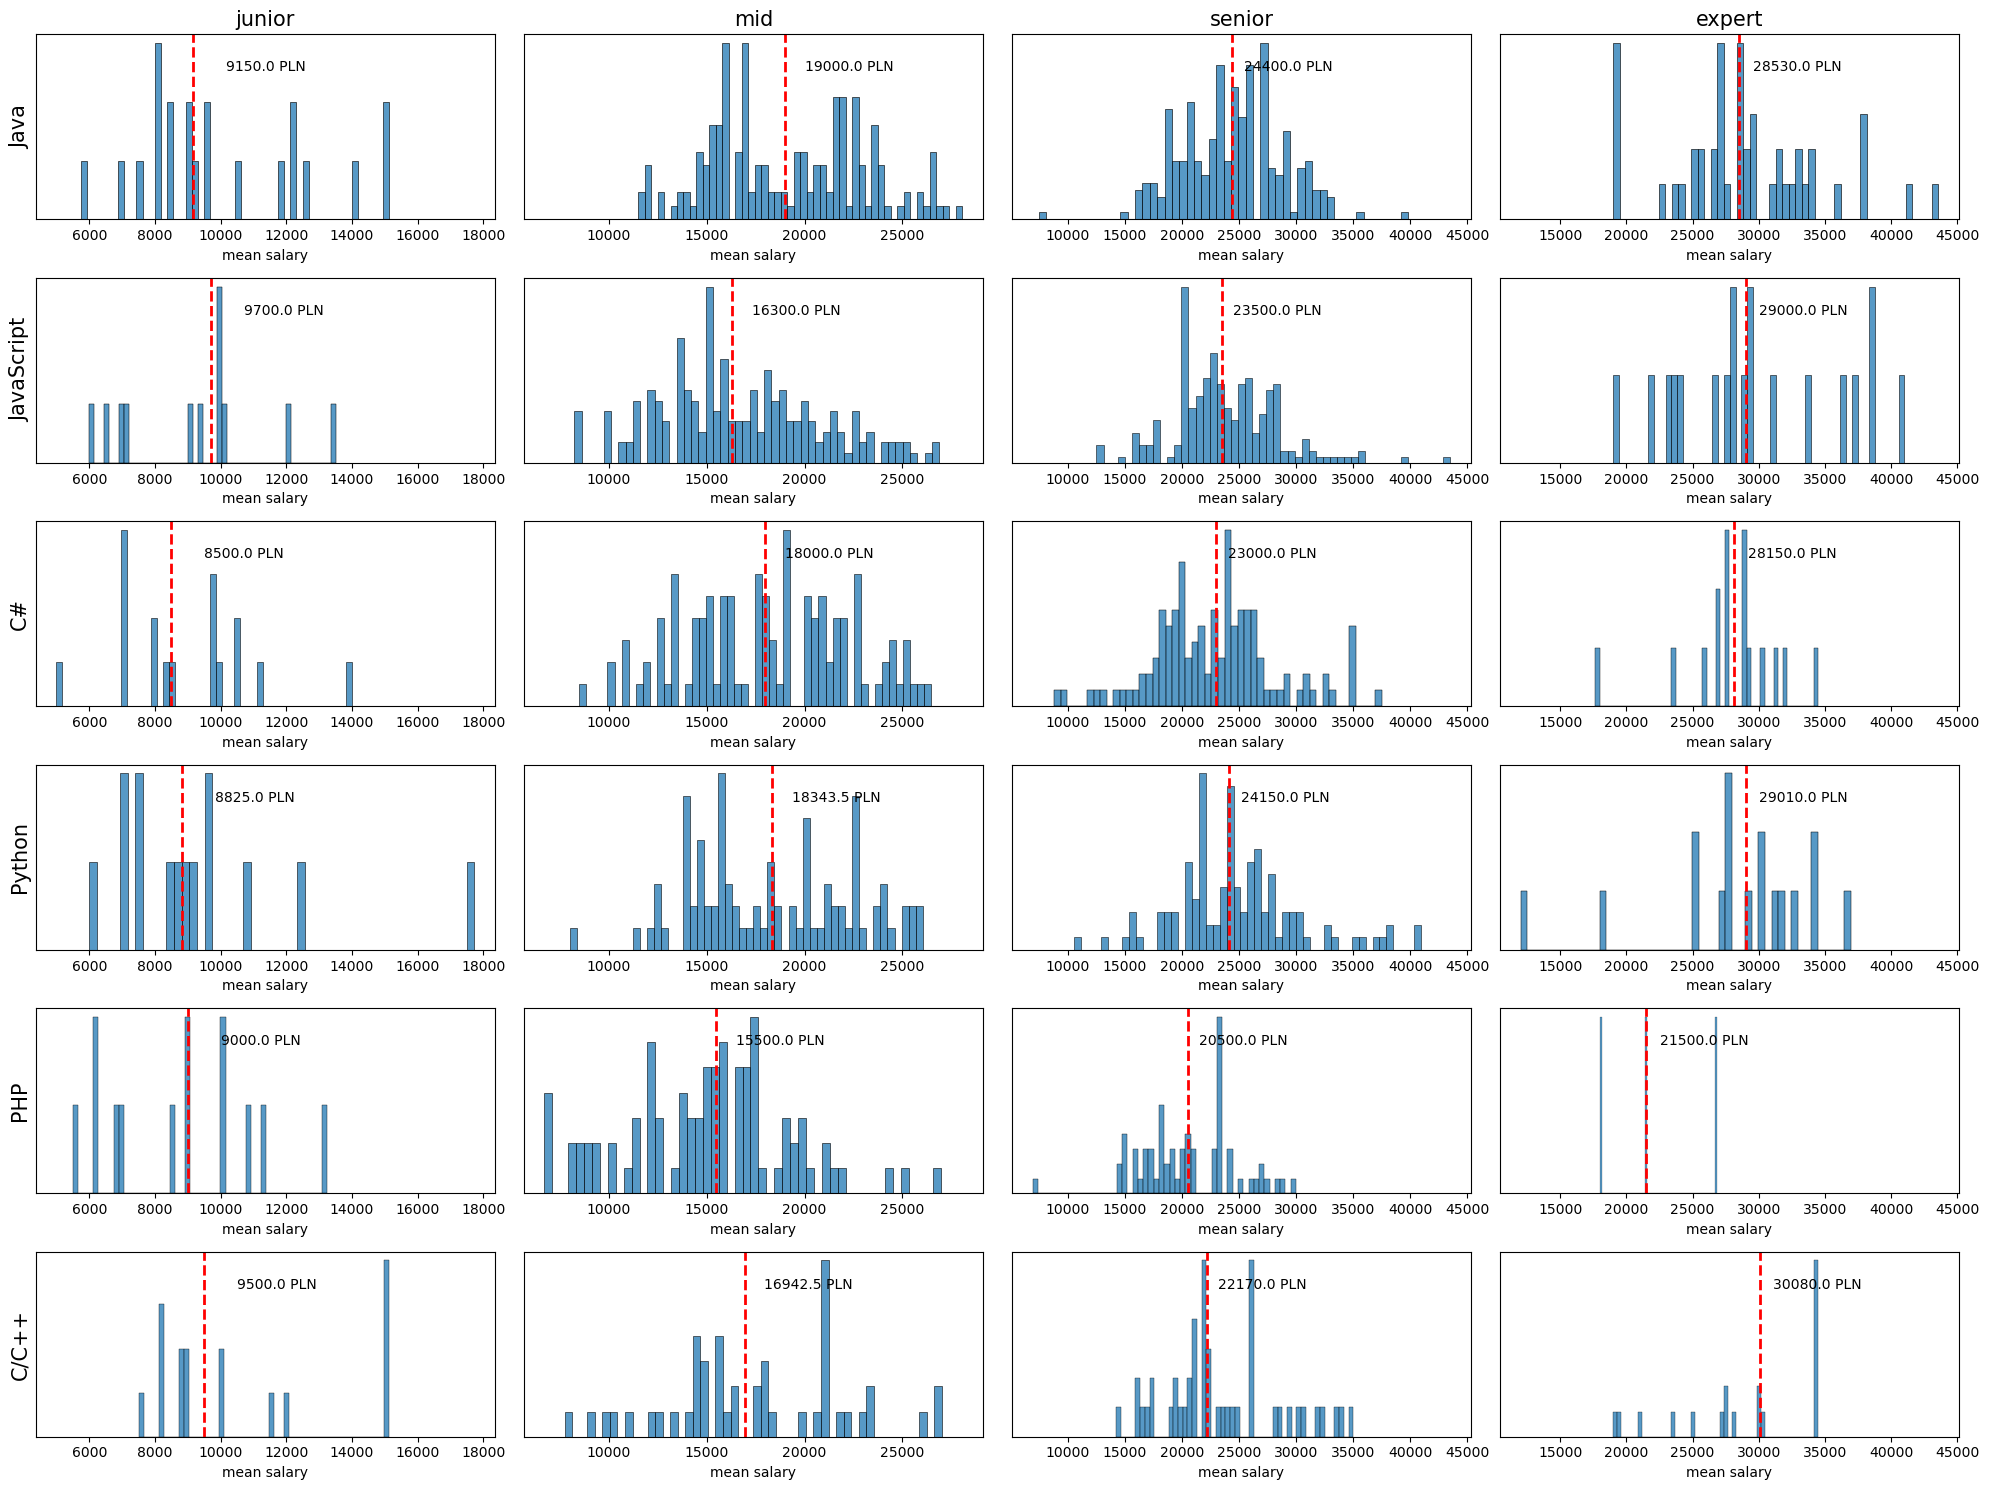

In [143]:
def plot_salary(segment_name, order):
    seniority_levels = ['junior', 'mid', 'senior', 'expert']
    segments = order
    
    plt.figure(figsize=(20, 15))
    ax = [None] * len(seniority_levels)

    for j in range(len(segments)):
        segment = segments[j]
        for i in range(len(seniority_levels)):
            seniority = seniority_levels[i]
            subset = df.loc[(df['seniority'] == seniority) & (df[segment_name] == segment)]
            median_salary = subset['mean salary'].median()
            ax[i] = plt.subplot(len(segments), 4, i+1 + 4*j, sharex=ax[i])
            plt.yticks([])
            if(j == 0):
                plt.title(seniority, fontdict={'size': 15})
            if(i == 0):
                plt.ylabel(segment, fontdict={'size': 15})
            sns.histplot(subset['mean salary'], bins=50, kde=False)
            plt.axvline(median_salary, color='red', linestyle='dashed', linewidth=2)
            plt.annotate(f'{median_salary} PLN', 
             xy=(median_salary + 1000, 0.8), xycoords=('data', 'axes fraction'))
    plt.tight_layout()
    plt.show()

plot_salary('technology', ['Java', 'JavaScript', 'C#', 'Python', 'PHP', 'C/C++'])

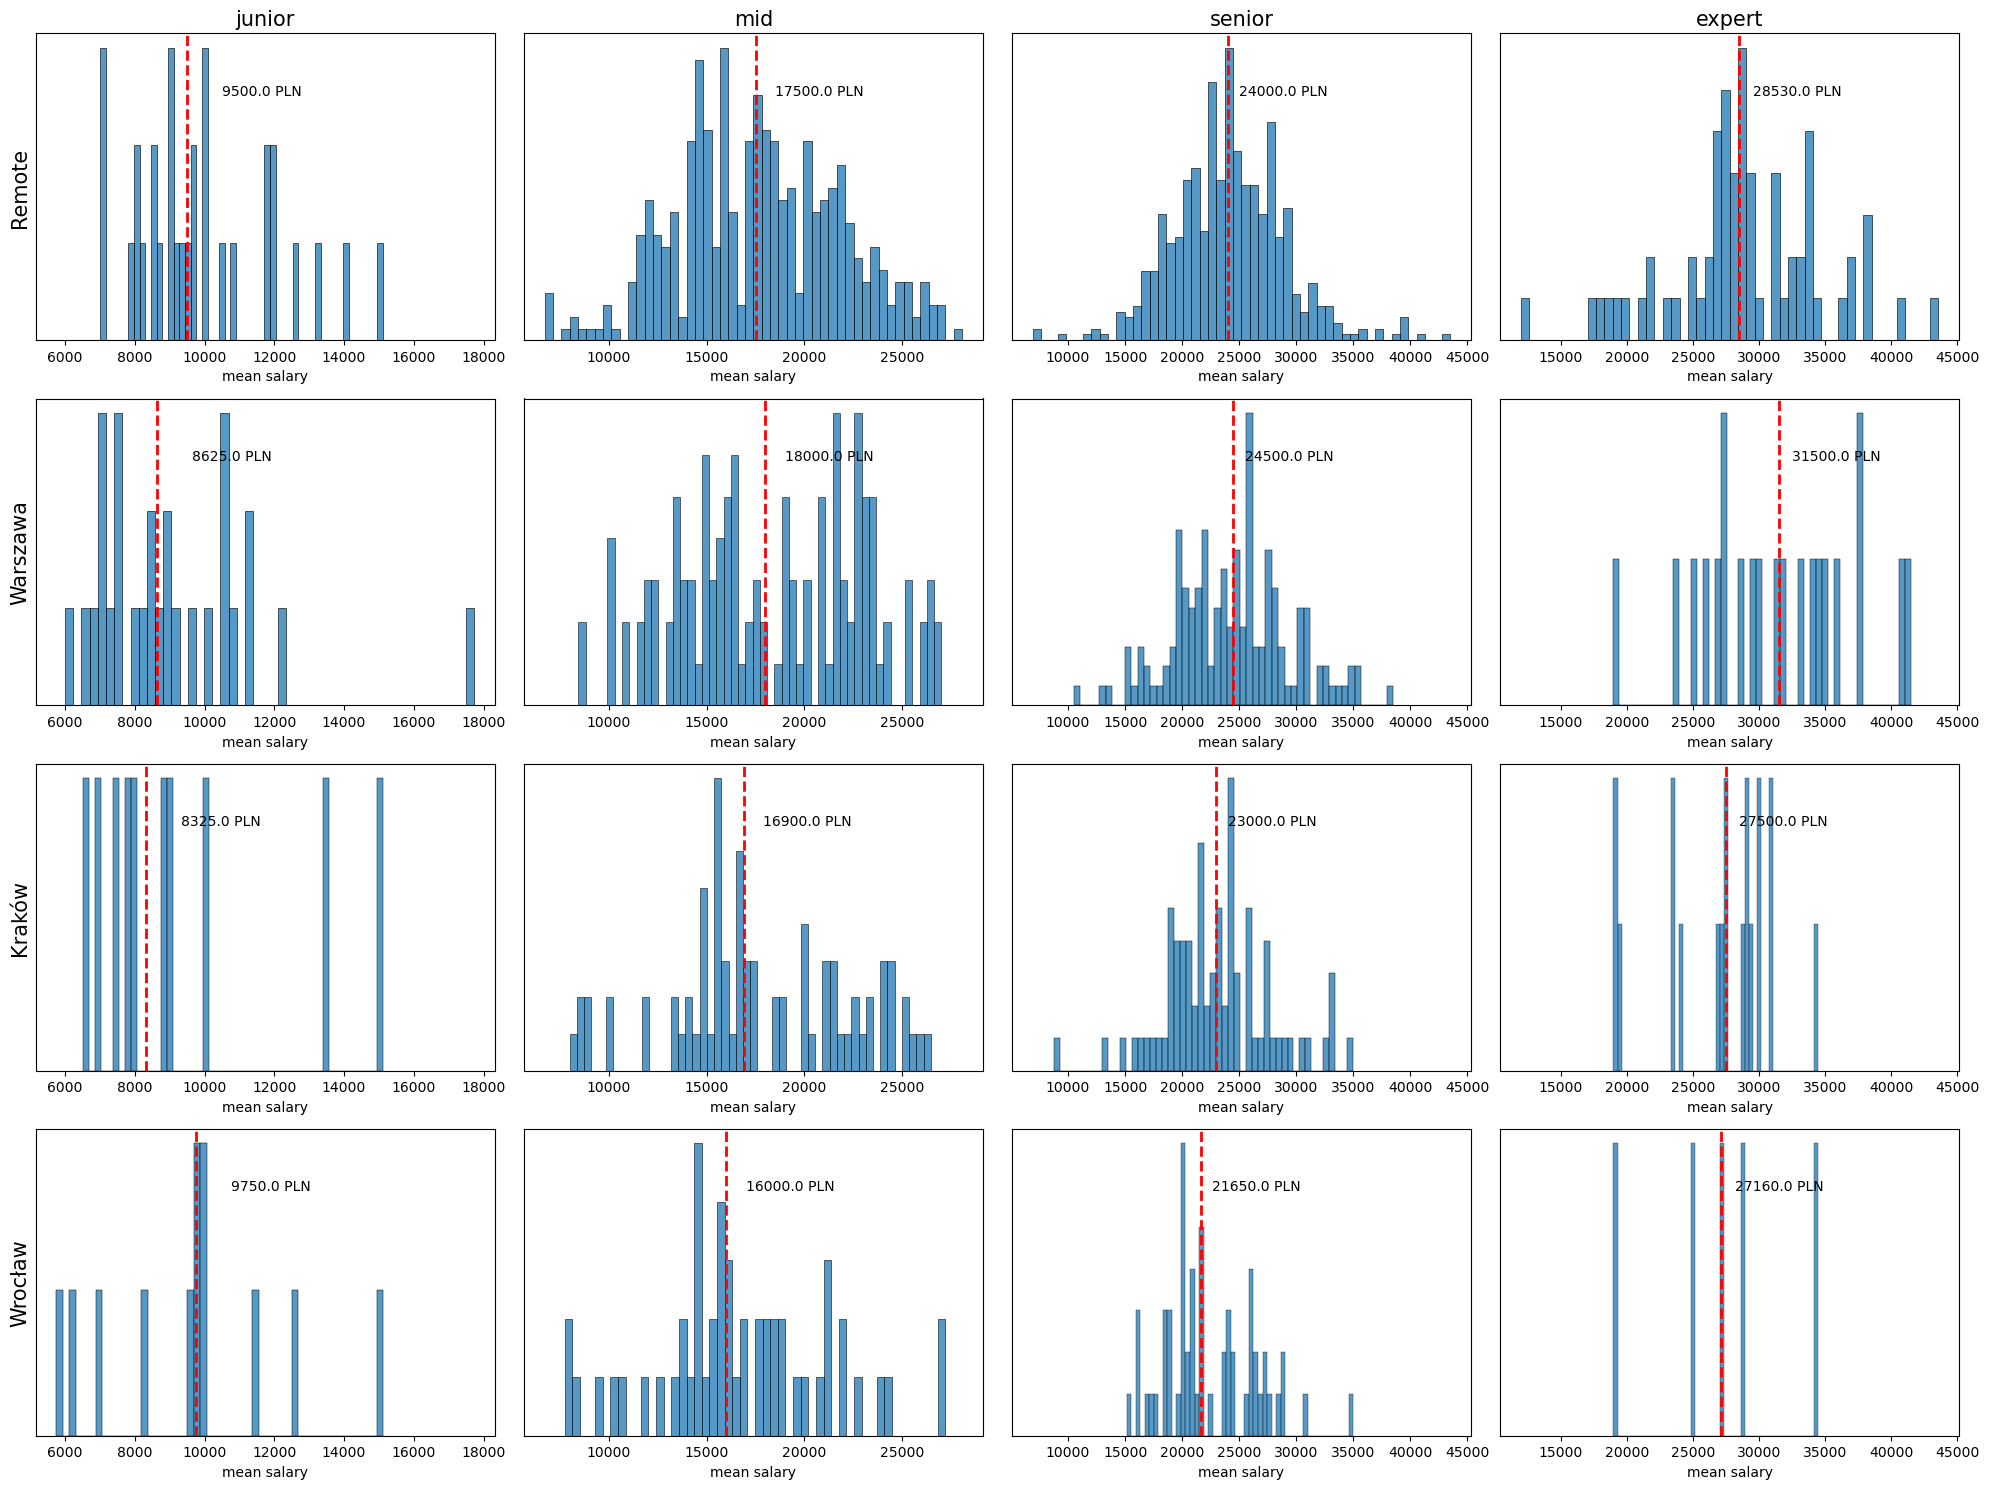

In [144]:
plot_salary('location', ['Remote', 'Warszawa', 'Kraków', 'Wrocław'])

# Job offers in Kraków

There are 188 companies looking for employee in Kraków. The top 3 in terms of job offers are:
- **Hitachi Energy** (sustainable energy solutions to buildings, utilities, industries, and infrastructure sectors: 9 offers)
- **Link Group** (providing software engineer talents for other companies: 8 offers)
- **Splunk** (helps capture, index and correlate real-time data in a searchable repository, from which it can generate graphs, reports, alerts, dashboards and visualizations: 5 offers) ex aequo with **ITDS Polska** (IT engineers outsourcing: 5 offers).

Top 5 technologies are: Java, JavaScript, C/C++, C# and Python.

In [145]:
# Number of companies
companies_total = df['company'].unique()
companies_krakow = df[df['location'] == 'Kraków']

print(f'Number of companies in Kraków: {len(companies_krakow)}')
print()

# List of companies in krakow with offers count
company_job_counts = companies_krakow['company'].value_counts()

pd.set_option('display.max_rows', None)
print(f'Number of companies in Kraków: {company_job_counts}')

Number of companies in Kraków: 188

Number of companies in Kraków: company
Hitachi Energy                                             9
Link Group                                                 8
Splunk                                                     5
ITDS Polska Sp. z o.o.                                     5
Scalo                                                      5
Volvo Tech Hub Poland                                      4
Branchspace                                                4
Tesco Technology                                           4
j-labs                                                     4
VOLT                                                       3
HSBC Technology Poland                                     3
Capgemini Poland                                           3
Motorola Solutions Systems Polska Sp. z o.o.               3
Ringier Axel Springer Tech                                 3
LegalZoom                                                  3
Antal Pola

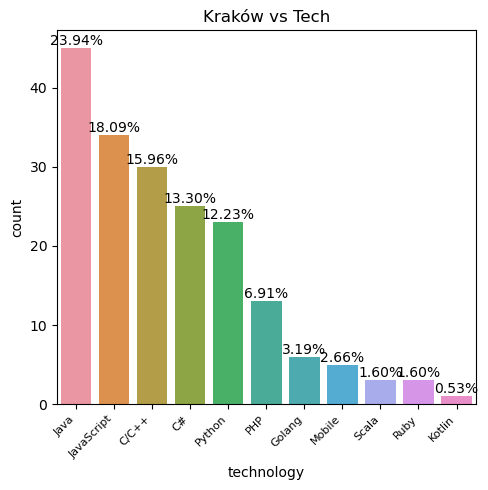

In [146]:
# Kraków vs Tech
plt.figure(figsize=(5, 5))

ax = sns.countplot(x='technology', data=companies_krakow, order=['Java', 'JavaScript', 'C/C++', 'C#', 'Python', 'PHP', 'Golang', 'Mobile', 'Scala', 'Ruby', 'Kotlin'])
plt.title('Kraków vs Tech')
plt.xticks(rotation=45, ha='right', fontsize=8)

for c in ax.containers:
        labels = [f'{h / len(companies_krakow["technology"]) * 100:.2f}%' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

plt.tight_layout()